# MNIST

### fetch mnist

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist['data'], mnist['target']

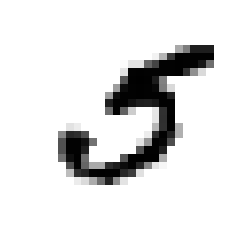

In [4]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

some_digit = X[36000]

some_digit_img = some_digit.reshape(28, 28)

plt.imshow(some_digit_img, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[36000]

5.0

In [6]:
X_train, y_train, X_test, y_test = X[:60000], y[60000], X[60000:], y[60000:]

In [7]:
import numpy as np

shuffled_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffled_idx], y[shuffled_idx]

## Binary classifier

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=5, tol=-np.infty)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([False])

### Binary classifier performanse

#### Cross-val

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9613, 0.9686, 0.9475])

In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90765, 0.9099 , 0.9114 ])

#### Confusion matrix

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53382,  1197],
       [ 1255,  4166]])

#### Precession and recall

In [16]:
from sklearn.metrics import precision_score, recall_score

In [17]:
precision_score(y_train_5, y_train_pred)

0.7768040275964945

In [18]:
recall_score(y_train_5, y_train_pred)

0.7684928979893009

In [19]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.772626112759644

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

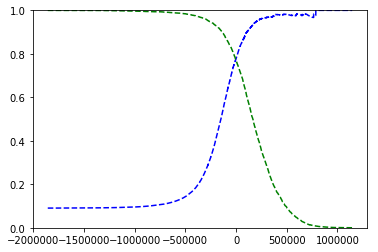

In [22]:
def plot_precision_recall_vs_thr(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], 'b--', label='prec')
    plt.plot(thresholds, recall[:-1], 'g--', label='rec')
    plt.ylim([0, 1])
    
plot_precision_recall_vs_thr(precision, recall, thresholds)
plt.show()

In [23]:
y_train_pred_90 = (y_scores > 70000)

In [24]:
precision_score(y_train_5, y_train_pred_90)

0.865937722842881

In [25]:
recall_score(y_train_5, y_train_pred_90)

0.6720162331673123

In [26]:
sgd_clf.decision_function([some_digit])

array([-12710.21777986])

#### ROC curve

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(y_train_5, y_scores)

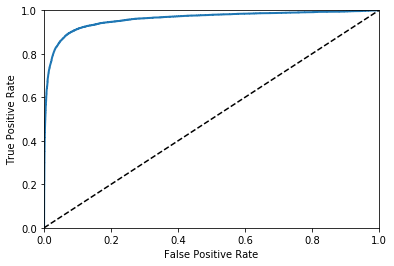

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9600284526362902

#### Random Forest Classifienr

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_score = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [31]:
y_scores_forest = y_probas_score[:, 1]
fpr_forest, tpr_forest, thr_forest = roc_curve(y_train_5, y_scores_forest)

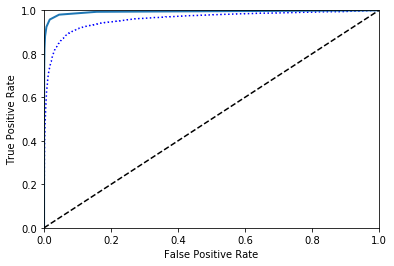

In [32]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.show()

In [33]:
roc_auc_score(y_train_5, y_scores_forest)

0.9932863217732052

In [34]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [35]:
precision_score(y_train_5, y_train_pred_forest)

0.98562582927908

In [36]:
recall_score(y_train_5, y_train_pred_forest)

0.8221730308061244

# Multiclass classifier

In [37]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
sgd_clf.predict([some_digit])

array([5.])

In [39]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-256667.26665549, -585759.88266979, -399105.6109741 ,
        -162469.08225383, -372810.77133927,  -12710.21777986,
        -819232.36791621, -303937.63644255, -669499.71140738,
        -648767.81432099]])

In [40]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=5, tol=-np.infty))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [41]:
ovo_clf.predict([some_digit])

array([5.])

In [42]:
len(ovo_clf.estimators_)

45

In [43]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [44]:
forest_clf.predict([some_digit])

array([5.])

In [45]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [46]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.86617676, 0.85919296, 0.86983047])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [48]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.90961808, 0.91154558, 0.90828624])

# Error Analysis

In [49]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [50]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [51]:
conf_mx

array([[5733,    3,   23,    9,   11,   49,   43,    9,   40,    3],
       [   2, 6472,   36,   28,    6,   43,    7,    9,  124,   15],
       [  56,   39, 5314,  101,   76,   24,  103,   58,  171,   16],
       [  47,   41,  125, 5345,    2,  236,   36,   52,  146,  101],
       [  20,   25,   35,    8, 5369,    8,   56,   30,   83,  208],
       [  73,   45,   31,  188,   79, 4587,  104,   28,  185,  101],
       [  31,   23,   44,    2,   38,   94, 5634,    5,   47,    0],
       [  27,   21,   68,   31,   59,   10,    6, 5799,   15,  229],
       [  50,  150,   60,  142,   14,  153,   61,   25, 5048,  148],
       [  46,   32,   27,   85,  165,   25,    2,  200,   79, 5288]])

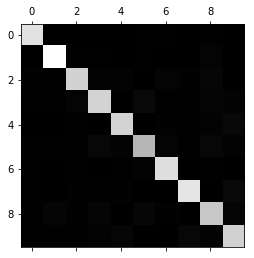

In [52]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [53]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

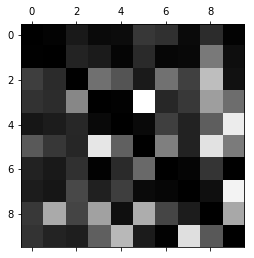

In [54]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel Classification 

In [55]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
# takes too long time on cpu 

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=2, verbose=2)

In [ ]:
f1_score(y_train, y_train_knn_pred, average='macro')

# Multioutput Classification

In [57]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [60]:
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

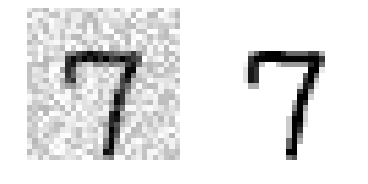

In [63]:
plt.subplot(1,2,1)
plot_digit(X_train_mod[36001])
plt.subplot(1,2,2)
plot_digit(y_train_mod[36001])

In [64]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [65]:
clean_digit = knn_clf.predict([X_test_mod[3000]])
plot_digit(clean_digit)
plt.subplot(1,2,1)
plot_digit(X_test_mod[3000])
plt.subplot(1,2,2)
plot_digit(y_train_mod[36001])

IndexError: index 36000 is out of bounds for axis 0 with size 10000